In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib # Thêm thư viện để lưu model
import os     # Thêm thư viện để quản lý đường dẫn, thư mục

In [13]:
df_original = pd.read_csv(r'E:\LEARN_5\XuLyNgonNguTuNhien\project\data\final_data.csv')
df = df_original.copy()
print("5 dòng dữ liệu đầu tiên (gốc):")
print(df.head())
df.dropna(subset=['text', 'Topic'], inplace=True)
print(f"\nSố lượng mẫu sau khi loại bỏ NaN: {len(df)}")

5 dòng dữ liệu đầu tiên (gốc):
                                                text Topic
0  công_cụ trí_tuệ_nhân_tạo hữu_dụng chatgpt cạnh...    AI
1  figure_trí tuệ nhân_tạo công_ty robot hình mỹ ...    AI
2  ceo microsoft trí_tuệ_nhân_tạo đảm_nhiệm viết ...    AI
3  trí_tuệ_nhân_tạo grok musk trả_lời internet el...    AI
4  openai xác_nhận chatgpt nịnh_hót openai chatgp...    AI

Số lượng mẫu sau khi loại bỏ NaN: 16238



--- Phân tích số lượng mẫu theo chủ đề ---
Số lượng mẫu theo chủ đề TRƯỚC KHI lọc thủ công:
Topic
Giáo dục 4.0               449
Người Việt 5 châu          448
Giải trí giới sao          444
Việc làm                   443
Tin tức sức khoẻ           443
Giải trí nhạc              441
Ebank                      440
Giải trí phim              440
Dân sinh                   439
Sống khoẻ                  439
Giao thông                 438
Bóng đá                    438
Chính trị                  437
Các môn thể thao khác      436
Quân sự                    434
Hậu trường thể thao        432
Kinh doanh quốc tế         430
Nhịp sống                  428
AI                         428
Thiết bị                   427
Giải trí thời trang        426
Vũ trụ                     422
Tin tức Giáo dục           421
Sân khấu mỹ thuật          419
Chuyển đổi số              417
Thị trường xe              416
Hàng hóa                   414
Du lịch                    410
Ẩm thực                    404
Tổ

C:\Users\Mai Xuan Truong\AppData\Local\Temp\ipykernel_12420\4001366875.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topic_counts.index, y=topic_counts.values, palette="viridis")


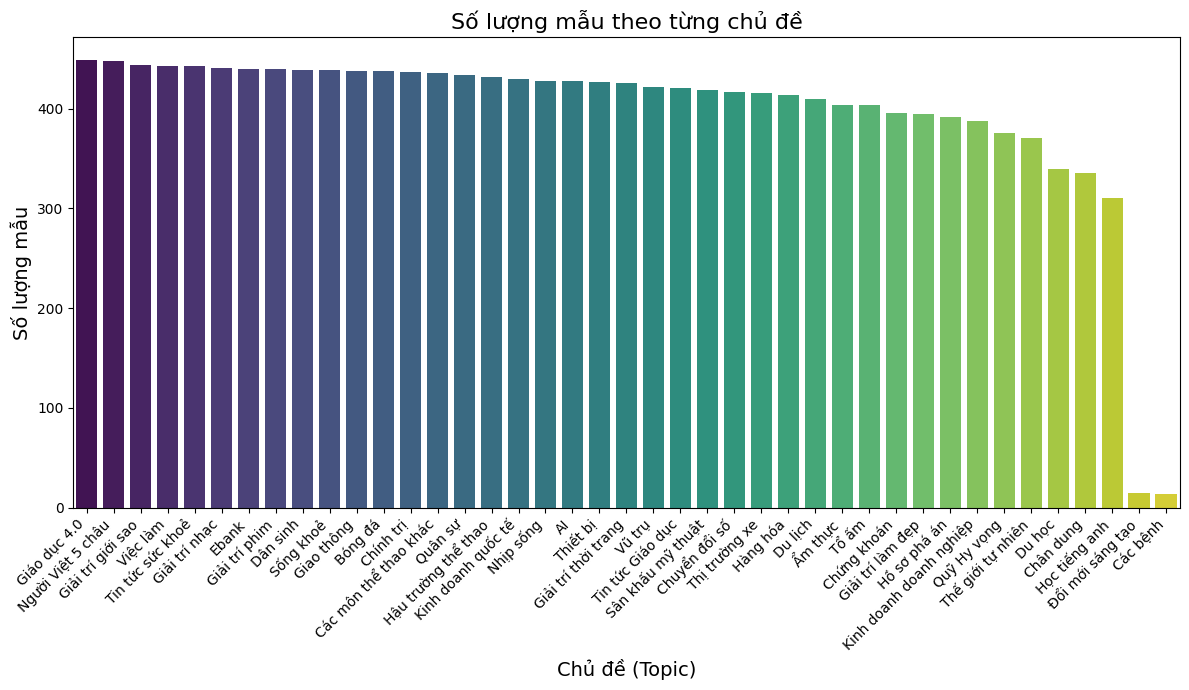

In [14]:
# --- 1.1. Phân tích số lượng mẫu theo chủ đề và cho phép loại bỏ thủ công ---
print("\n--- Phân tích số lượng mẫu theo chủ đề ---")
topic_counts = df['Topic'].value_counts()
print("Số lượng mẫu theo chủ đề TRƯỚC KHI lọc thủ công:")
print(topic_counts)

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 7)) # Tăng kích thước để dễ nhìn hơn
sns.barplot(x=topic_counts.index, y=topic_counts.values, palette="viridis")
plt.title('Số lượng mẫu theo từng chủ đề', fontsize=16)
plt.xlabel('Chủ đề (Topic)', fontsize=14)
plt.ylabel('Số lượng mẫu', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10) # Xoay nhãn trục x cho dễ đọc
plt.yticks(fontsize=10)
plt.tight_layout() # Tự động điều chỉnh để các thành phần không bị đè lên nhau
plt.show()


--- Gộp chủ đề thủ công ---
Số lượng mẫu theo chủ đề TRƯỚC KHI gộp:
Topic
Giáo dục 4.0               449
Người Việt 5 châu          448
Giải trí giới sao          444
Việc làm                   443
Tin tức sức khoẻ           443
Giải trí nhạc              441
Ebank                      440
Giải trí phim              440
Dân sinh                   439
Sống khoẻ                  439
Giao thông                 438
Bóng đá                    438
Chính trị                  437
Các môn thể thao khác      436
Quân sự                    434
Hậu trường thể thao        432
Kinh doanh quốc tế         430
Nhịp sống                  428
AI                         428
Thiết bị                   427
Giải trí thời trang        426
Vũ trụ                     422
Tin tức Giáo dục           421
Sân khấu mỹ thuật          419
Chuyển đổi số              417
Thị trường xe              416
Hàng hóa                   414
Du lịch                    410
Ẩm thực                    404
Tổ ấm                     

C:\Users\Mai Xuan Truong\AppData\Local\Temp\ipykernel_12420\1791029012.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topic_counts_after.index, y=topic_counts_after.values, palette="crest")


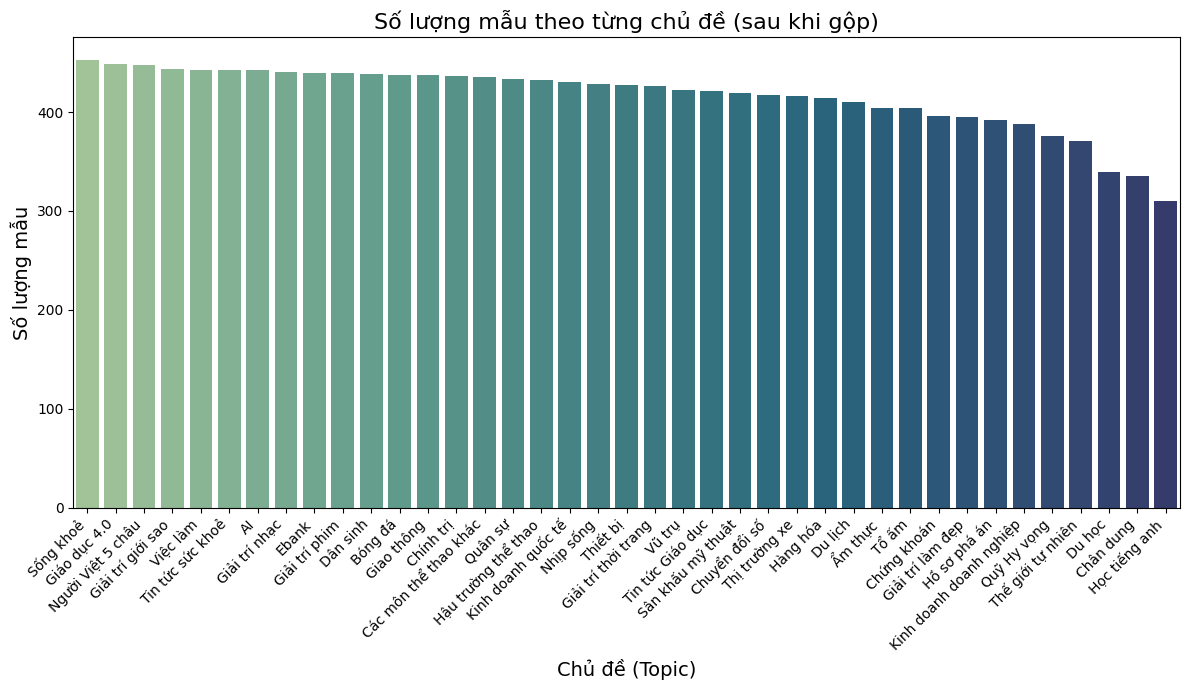

In [15]:
# --- Gộp các chủ đề cụ thể vào nhóm chủ đề lớn hơn ---
TOPIC_MAPPING = {
    "Đổi mới sáng tạo": "AI",
    "Các bệnh": "Sống khoẻ"
}

print("\n--- Gộp chủ đề thủ công ---")
print("Số lượng mẫu theo chủ đề TRƯỚC KHI gộp:")
print(df['Topic'].value_counts())

# Gộp chủ đề
df['Topic'] = df['Topic'].apply(lambda t: TOPIC_MAPPING.get(t, t))  # Giữ nguyên nếu không nằm trong TOPIC_MAPPING

print("\nSố lượng mẫu theo chủ đề SAU KHI gộp:")
topic_counts_after = df['Topic'].value_counts()
print(topic_counts_after)

# --- Vẽ lại biểu đồ số lượng chủ đề sau khi gộp ---
plt.figure(figsize=(12, 7))
sns.barplot(x=topic_counts_after.index, y=topic_counts_after.values, palette="crest")
plt.title('Số lượng mẫu theo từng chủ đề (sau khi gộp)', fontsize=16)
plt.xlabel('Chủ đề (Topic)', fontsize=14)
plt.ylabel('Số lượng mẫu', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


In [16]:
# --- 1.2. Xáo trộn (Shuffle) dữ liệu ---
print("\n--- Xáo trộn dữ liệu ---")
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
print("5 dòng dữ liệu đầu tiên SAU KHI xáo trộn:")
print(df.head())


--- Xáo trộn dữ liệu ---
5 dòng dữ liệu đầu tiên SAU KHI xáo trộn:
                                                text                    Topic
0  quán bar lịch_sử thành_phố hồ_chí_minh báo nướ...                  Du lịch
1  âm_mưu tàn_độc cướp thỏi vàng singaporemột quâ...             Hồ sơ phá án
2  bến_xe miền tây doanh_thu kỷ_lục quý đầu quý i...  Kinh doanh doanh nghiệp
3  nguyễn_văn_bình đầu thắng kergozou giải xe_đạp...    Các môn thể thao khác
4  trải_nghiệm chảy nước_mắt lẩu tứ_xuyên sụt_sùi...                  Ẩm thực


In [17]:
# --- 2. Chia dữ liệu thành tập huấn luyện và tập kiểm thử ---
X = df['text']
y = df['Topic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nKích thước tập huấn luyện: {len(X_train)}")
print(f"Kích thước tập kiểm thử: {len(X_test)}")
print("Phân phối chủ đề trong tập huấn luyện (%):")
print(y_train.value_counts(normalize=True).round(2))
print("Phân phối chủ đề trong tập kiểm thử (%):")
print(y_test.value_counts(normalize=True).round(2))


Kích thước tập huấn luyện: 12990
Kích thước tập kiểm thử: 3248
Phân phối chủ đề trong tập huấn luyện (%):
Topic
Sống khoẻ                  0.03
Giáo dục 4.0               0.03
Người Việt 5 châu          0.03
Giải trí giới sao          0.03
Việc làm                   0.03
Tin tức sức khoẻ           0.03
AI                         0.03
Giải trí nhạc              0.03
Ebank                      0.03
Giải trí phim              0.03
Dân sinh                   0.03
Bóng đá                    0.03
Giao thông                 0.03
Chính trị                  0.03
Các môn thể thao khác      0.03
Quân sự                    0.03
Hậu trường thể thao        0.03
Kinh doanh quốc tế         0.03
Thiết bị                   0.03
Nhịp sống                  0.03
Giải trí thời trang        0.03
Vũ trụ                     0.03
Tin tức Giáo dục           0.03
Sân khấu mỹ thuật          0.03
Chuyển đổi số              0.03
Thị trường xe              0.03
Hàng hóa                   0.03
Du lịch                

In [18]:
# --- 3. Vector hóa văn bản sử dụng TF-IDF ---
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"\nKích thước ma trận TF-IDF của tập huấn luyện: {X_train_tfidf.shape}")
print(f"Kích thước ma trận TF-IDF của tập kiểm thử: {X_test_tfidf.shape}")

labels = sorted(y.unique())


Kích thước ma trận TF-IDF của tập huấn luyện: (12990, 5000)
Kích thước ma trận TF-IDF của tập kiểm thử: (3248, 5000)


In [19]:
# --- 4. Huấn luyện và Đánh giá Mô hình Multinomial Naive Bayes ---
print("\n--- Mô hình Multinomial Naive Bayes ---")
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Độ chính xác (Accuracy): {accuracy_nb:.4f}")
print("Báo cáo phân loại (Classification Report):")
print(classification_report(y_test, y_pred_nb, labels=labels, zero_division=0, target_names=labels if labels else None))
cm_nb = confusion_matrix(y_test, y_pred_nb, labels=labels)


--- Mô hình Multinomial Naive Bayes ---
Độ chính xác (Accuracy): 0.8473
Báo cáo phân loại (Classification Report):
                         precision    recall  f1-score   support

                     AI       0.78      0.87      0.82        89
                Bóng đá       0.82      0.94      0.88        88
          Chuyển đổi số       0.80      0.53      0.64        83
              Chân dung       0.79      0.78      0.78        67
              Chính trị       0.89      0.92      0.90        87
            Chứng khoán       0.91      0.99      0.95        79
  Các môn thể thao khác       0.83      0.95      0.89        87
                 Du học       0.89      0.82      0.85        68
                Du lịch       0.88      0.77      0.82        82
               Dân sinh       0.88      0.78      0.83        88
                  Ebank       0.89      0.92      0.91        88
             Giao thông       0.82      0.99      0.90        88
           Giáo dục 4.0       0.70    

In [20]:
# --- 5. Huấn luyện và Đánh giá Mô hình Logistic Regression ---
print("\n--- Mô hình Logistic Regression ---")
lr_model = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)
lr_model.fit(X_train_tfidf, y_train)
y_pred_lr = lr_model.predict(X_test_tfidf)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Độ chính xác (Accuracy): {accuracy_lr:.4f}")
print("Báo cáo phân loại (Classification Report):")
print(classification_report(y_test, y_pred_lr, labels=labels, zero_division=0, target_names=labels if labels else None))
cm_lr = confusion_matrix(y_test, y_pred_lr, labels=labels)


--- Mô hình Logistic Regression ---
Độ chính xác (Accuracy): 0.8784
Báo cáo phân loại (Classification Report):
                         precision    recall  f1-score   support

                     AI       0.80      0.90      0.85        89
                Bóng đá       0.93      0.88      0.90        88
          Chuyển đổi số       0.73      0.65      0.69        83
              Chân dung       0.82      0.84      0.83        67
              Chính trị       0.90      0.93      0.92        87
            Chứng khoán       0.92      0.97      0.94        79
  Các môn thể thao khác       0.88      0.97      0.92        87
                 Du học       0.91      0.85      0.88        68
                Du lịch       0.87      0.80      0.84        82
               Dân sinh       0.85      0.84      0.85        88
                  Ebank       0.90      0.93      0.92        88
             Giao thông       0.89      0.93      0.91        88
           Giáo dục 4.0       0.92      0.

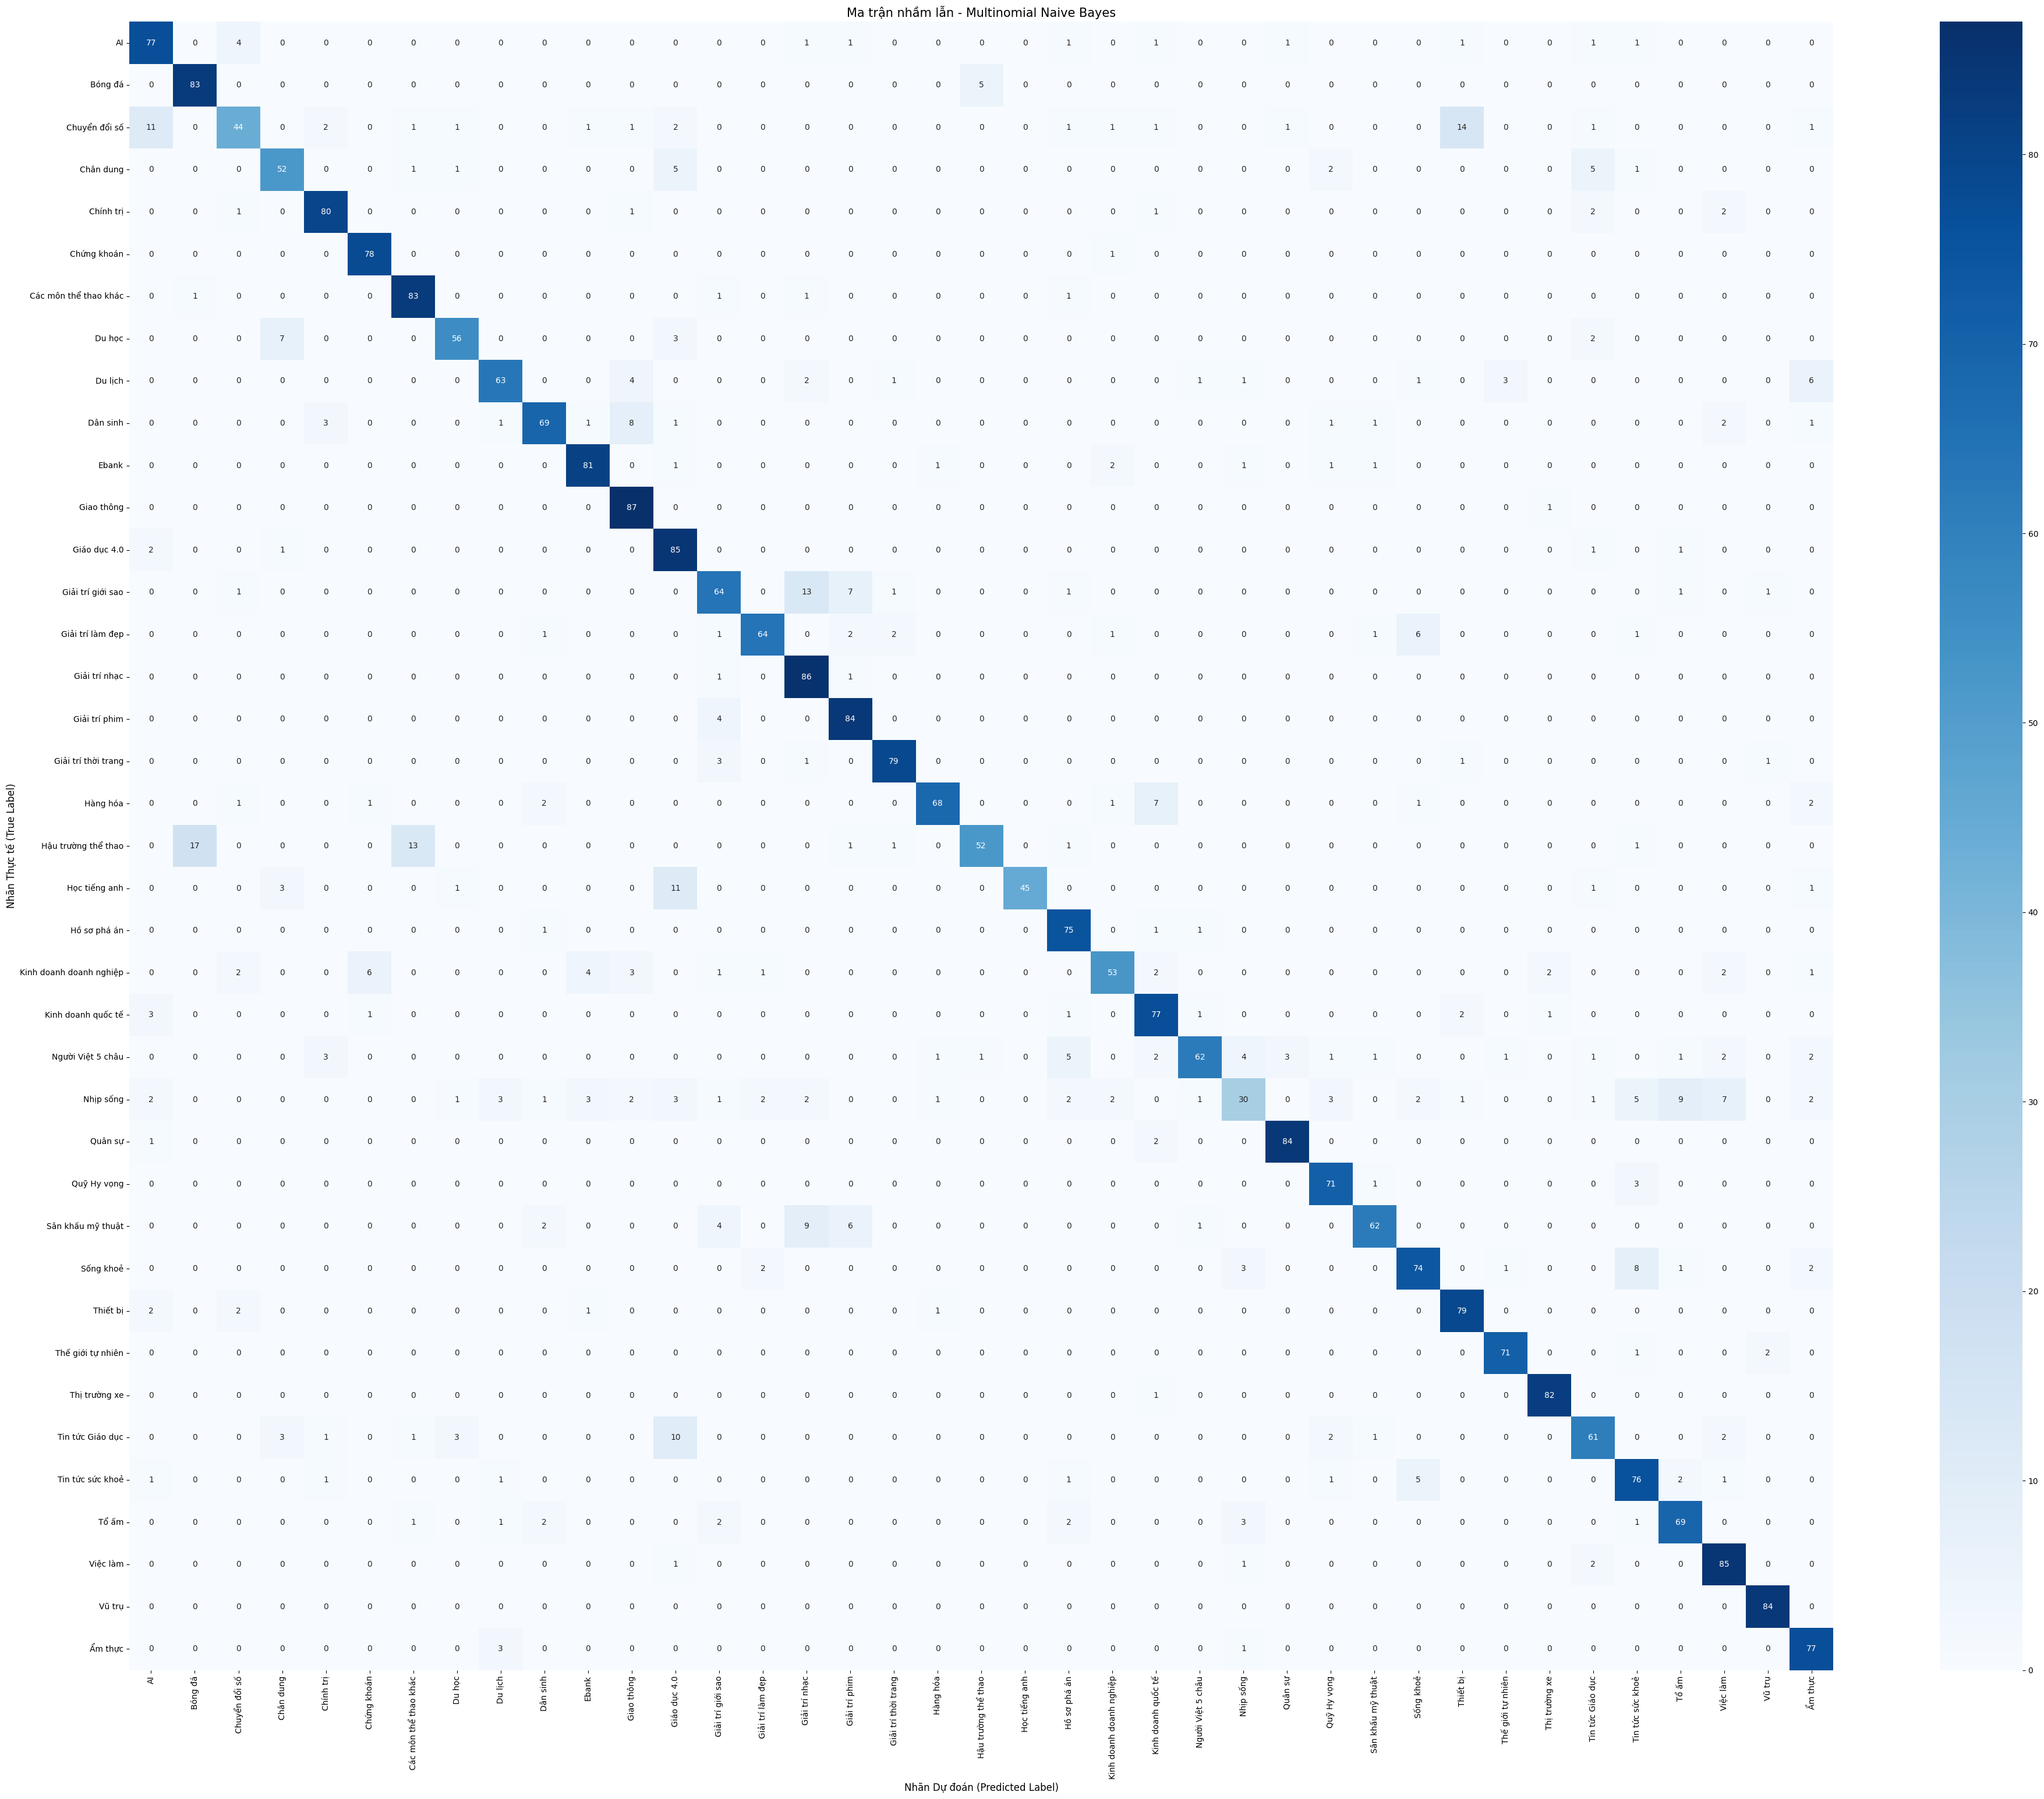

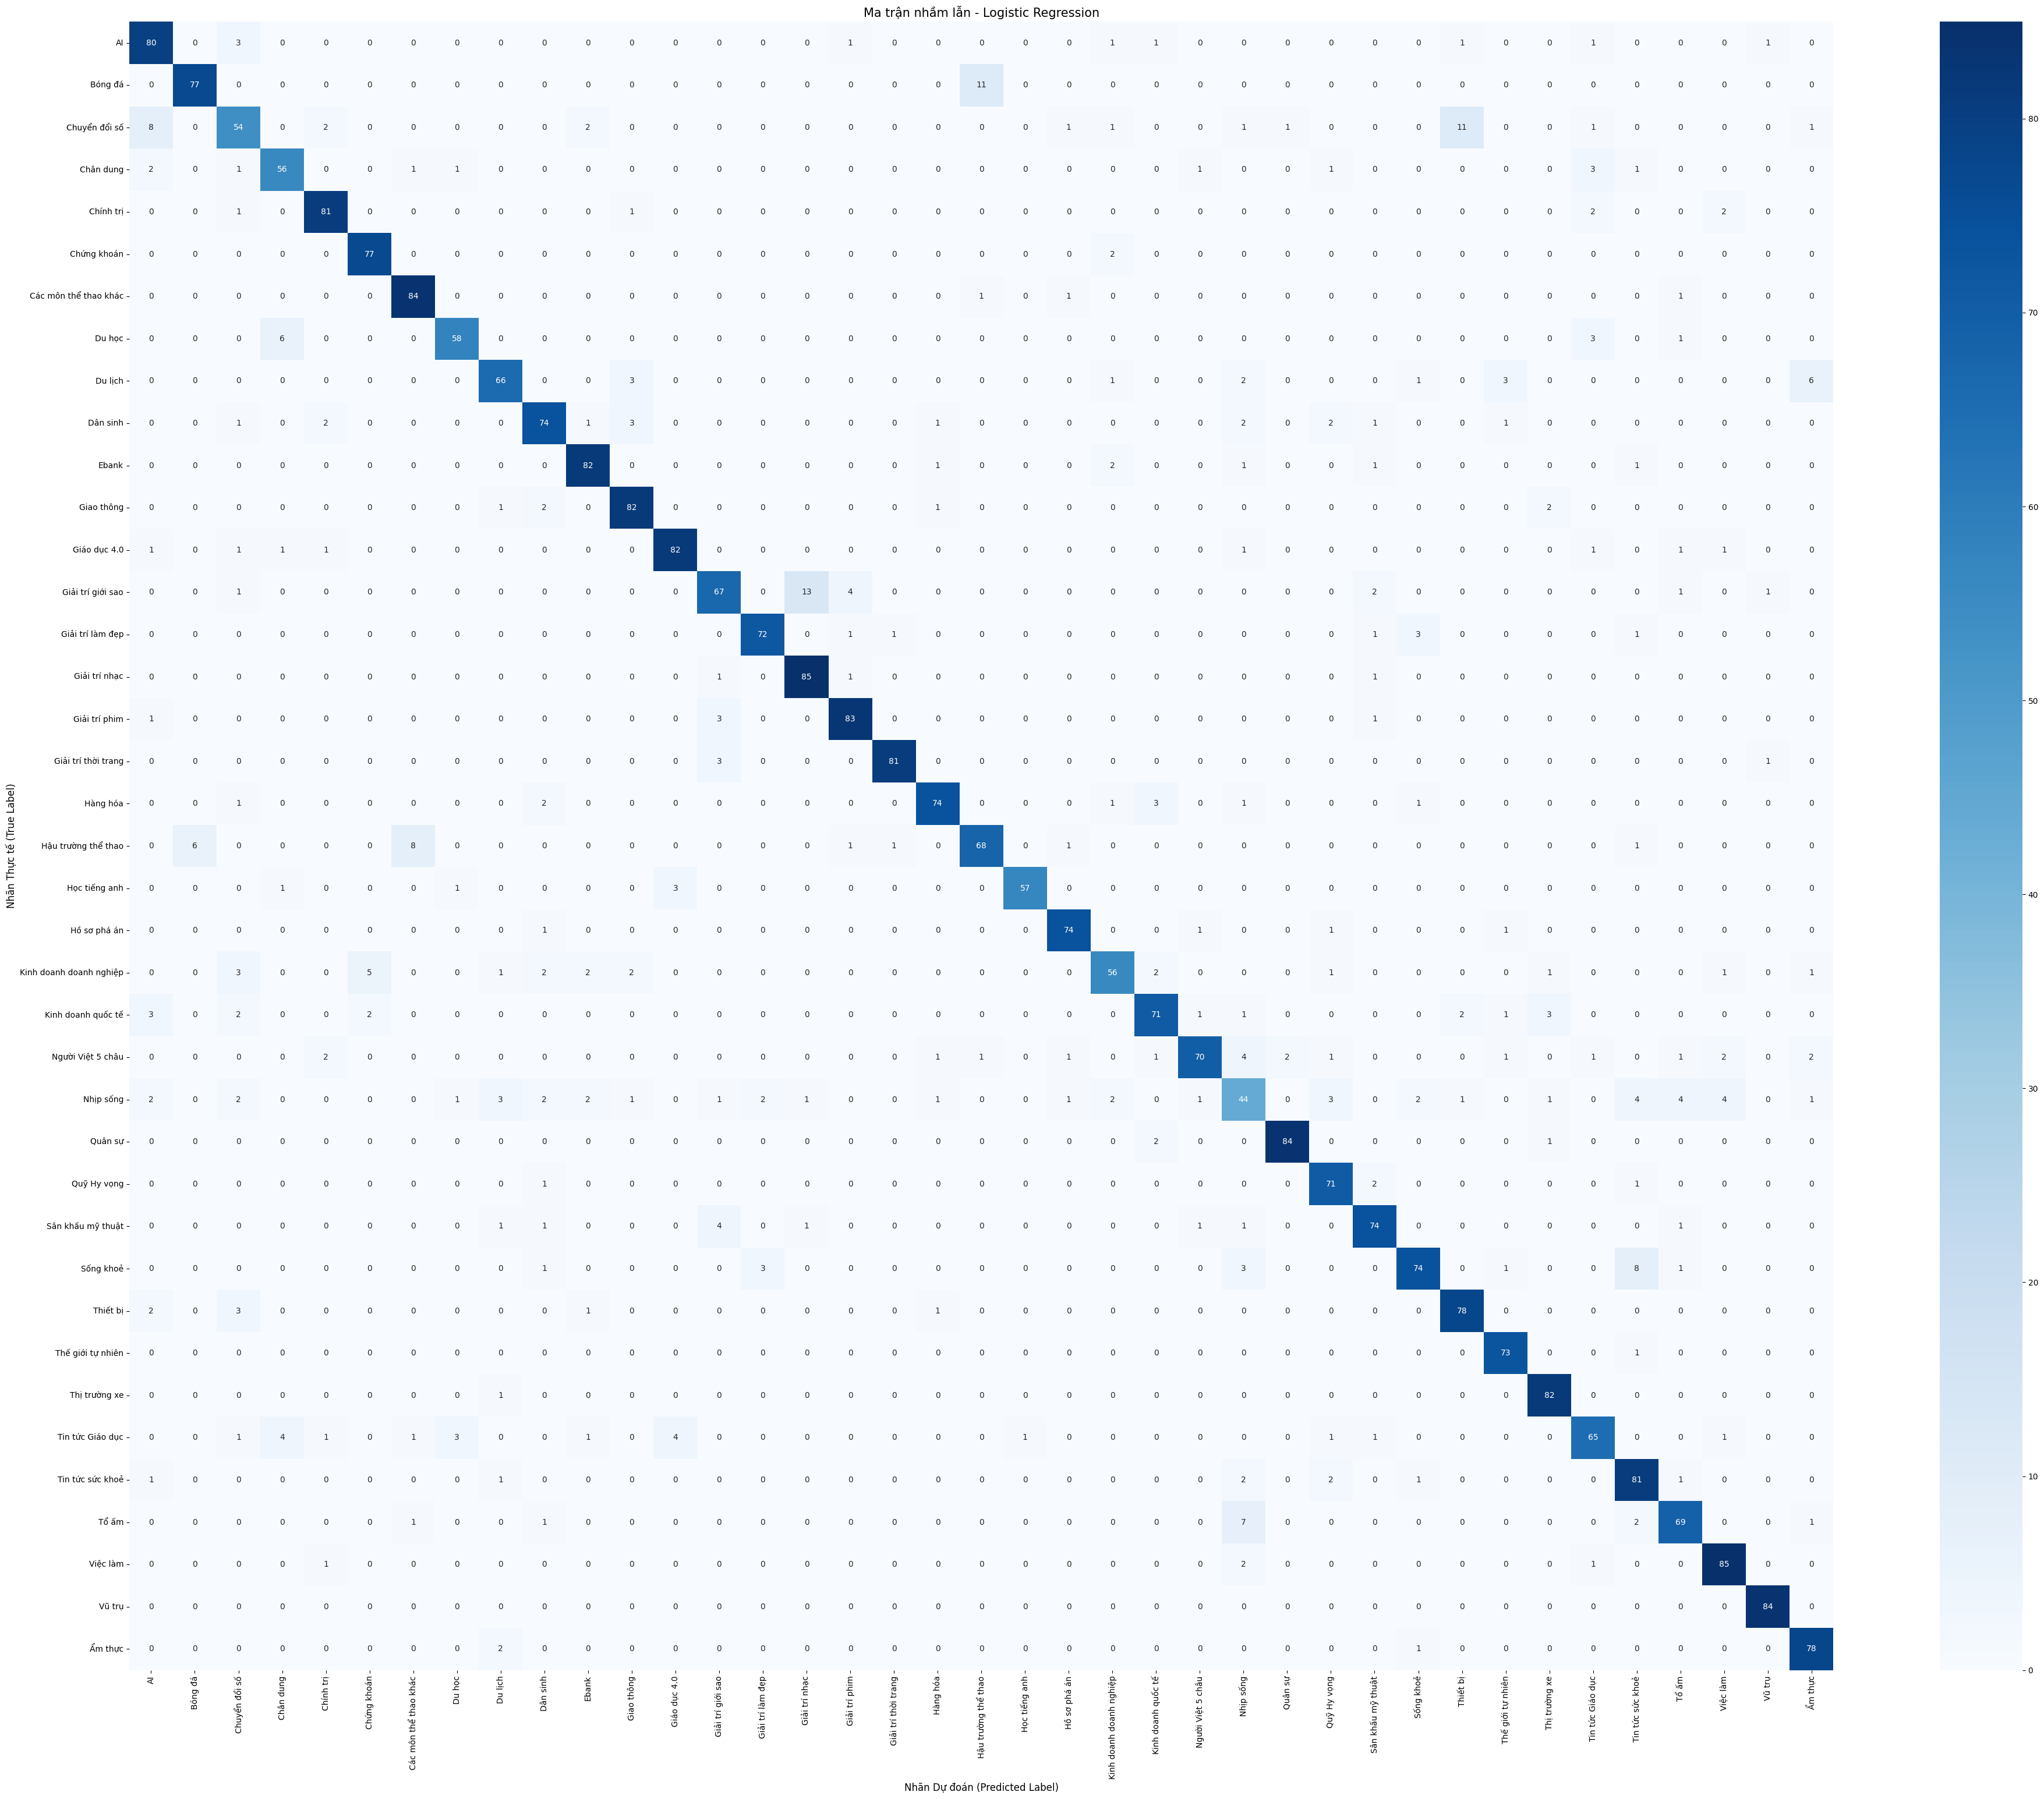

In [21]:
# --- 6. Trực quan hóa Ma trận nhầm lẫn ---
def plot_confusion_matrix(cm, classes, title):
    if not classes: # Kiểm tra nếu danh sách classes rỗng
        print(f"Không thể vẽ ma trận nhầm lẫn cho '{title}' vì không có nhãn nào được cung cấp.")
        return
    plt.figure(figsize=(max(6, len(classes)), max(4, int(len(classes)*0.8))))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes)
    plt.title(title, fontsize=15)
    plt.ylabel('Nhãn Thực tế (True Label)', fontsize=12)
    plt.xlabel('Nhãn Dự đoán (Predicted Label)', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

if len(y_test) > 0 and labels: # Kiểm tra labels không rỗng
    plot_confusion_matrix(cm_nb, labels, 'Ma trận nhầm lẫn - Multinomial Naive Bayes')
    plot_confusion_matrix(cm_lr, labels, 'Ma trận nhầm lẫn - Logistic Regression')
else:
    print("\nKhông đủ dữ liệu trong tập kiểm thử hoặc không có nhãn hợp lệ để vẽ ma trận nhầm lẫn.")

In [22]:
# --- 7. LƯU MÔ HÌNH VÀ TFIDF VECTORIZER ---
MODEL_DIR = r'E:\LEARN_5\XuLyNgonNguTuNhien\project\models'
if not os.path.exists(MODEL_DIR):
    os.makedirs(MODEL_DIR)
    print(f"Đã tạo thư mục: {MODEL_DIR}")

tfidf_vectorizer_path = os.path.join(MODEL_DIR, 'tfidf_vectorizer.joblib')
nb_model_path = os.path.join(MODEL_DIR, 'naive_bayes_model.joblib')
lr_model_path = os.path.join(MODEL_DIR, 'logistic_regression_model.joblib')

# Lưu TF-IDF Vectorizer
try:
    if hasattr(tfidf_vectorizer, 'vocabulary_') and tfidf_vectorizer.vocabulary_:
        joblib.dump(tfidf_vectorizer, tfidf_vectorizer_path)
        print(f"TF-IDF Vectorizer đã được lưu vào: {tfidf_vectorizer_path}")
    else:
        print("Lỗi: TF-IDF Vectorizer chưa được fit hoặc rỗng, không thể lưu.")
except Exception as e:
    print(f"Lỗi khi lưu TF-IDF Vectorizer: {e}")

# Lưu mô hình Naive Bayes
try:
    if hasattr(nb_model, 'classes_') and len(nb_model.classes_) > 0:
        joblib.dump(nb_model, nb_model_path)
        print(f"Mô hình Naive Bayes đã được lưu vào: {nb_model_path}")
    else:
        print("Lỗi: Mô hình Naive Bayes chưa được huấn luyện hoặc rỗng, không thể lưu.")
except Exception as e:
    print(f"Lỗi khi lưu mô hình Naive Bayes: {e}")

# Lưu mô hình Logistic Regression
try:
    if hasattr(lr_model, 'classes_') and len(lr_model.classes_) > 0:
        joblib.dump(lr_model, lr_model_path)
        print(f"Mô hình Logistic Regression đã được lưu vào: {lr_model_path}")
    else:
        print("Lỗi: Mô hình Logistic Regression chưa được huấn luyện hoặc rỗng, không thể lưu.")
except Exception as e:
    print(f"Lỗi khi lưu mô hình Logistic Regression: {e}")

print("\n--- Quá trình huấn luyện và lưu mô hình hoàn tất! ---")

TF-IDF Vectorizer đã được lưu vào: E:\LEARN_5\XuLyNgonNguTuNhien\project\models\tfidf_vectorizer.joblib
Mô hình Naive Bayes đã được lưu vào: E:\LEARN_5\XuLyNgonNguTuNhien\project\models\naive_bayes_model.joblib
Mô hình Logistic Regression đã được lưu vào: E:\LEARN_5\XuLyNgonNguTuNhien\project\models\logistic_regression_model.joblib

--- Quá trình huấn luyện và lưu mô hình hoàn tất! ---
